In [13]:
import sys
import os
import pandas as pd

# Step 1: Automatically find the project root (folder containing 'src')
current_dir = os.getcwd()
project_root = current_dir

while not os.path.exists(os.path.join(project_root, 'src')):
    parent = os.path.dirname(project_root)
    if parent == project_root:
        raise FileNotFoundError("Could not find 'src' folder in any parent directories!")
    project_root = parent

# Step 2: Add project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root detected: {project_root}")

# Step 4: Load your CSV file
data_path = r'E:\Credit-Risk-Probability-Model-for-Alternative-Data-wek_4\data\raw\data.csv'
try:
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print(f"CSV file not found at: {data_path}")


Project root detected: e:\Credit-Risk-Probability-Model-for-Alternative-Data-wek_4
Data loaded successfully! Shape: (95662, 16)


In [14]:
from src.eda import EDAAnalyzer
analyzer = EDAAnalyzer(df)

In [15]:
analyzer.dataset_structure()

{'rows': 95662,
 'columns': 16,
 'dtypes': TransactionId            object
 BatchId                  object
 AccountId                object
 SubscriptionId           object
 CustomerId               object
 CurrencyCode             object
 CountryCode               int64
 ProviderId               object
 ProductId                object
 ProductCategory          object
 ChannelId                object
 Amount                  float64
 Value                     int64
 TransactionStartTime     object
 PricingStrategy           int64
 FraudResult               int64
 dtype: object}

In [16]:
analyzer.summary_statistics()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


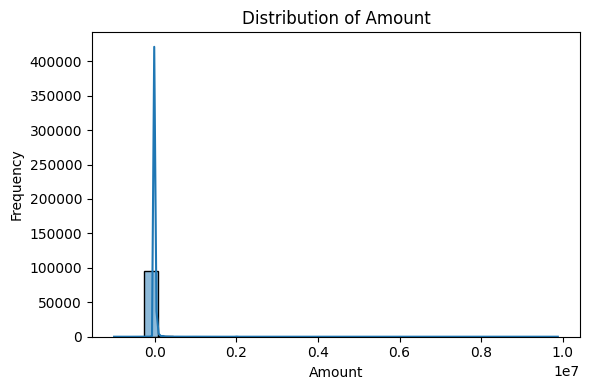

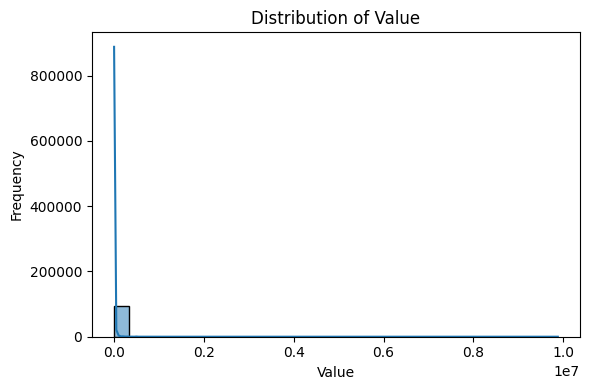

In [17]:
analyzer.plot_numerical_distributions()

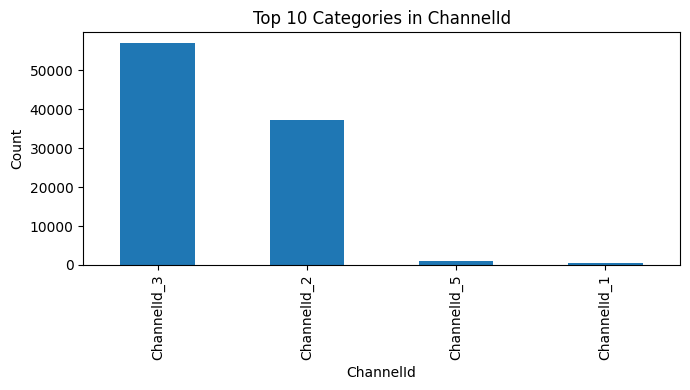

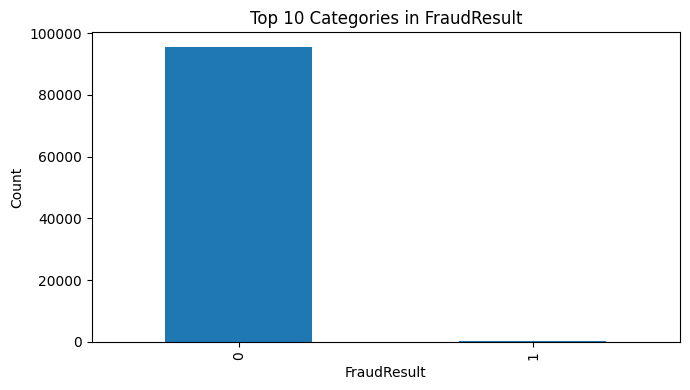

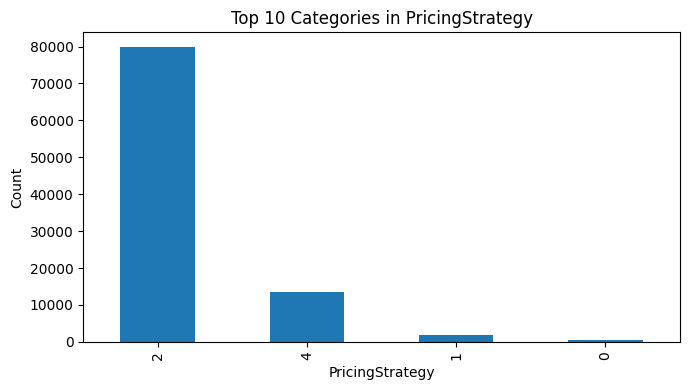

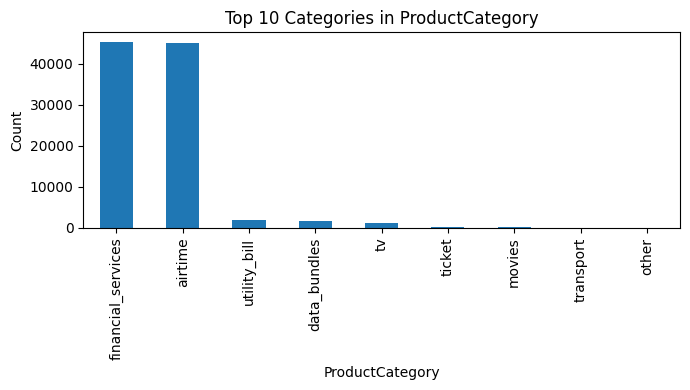

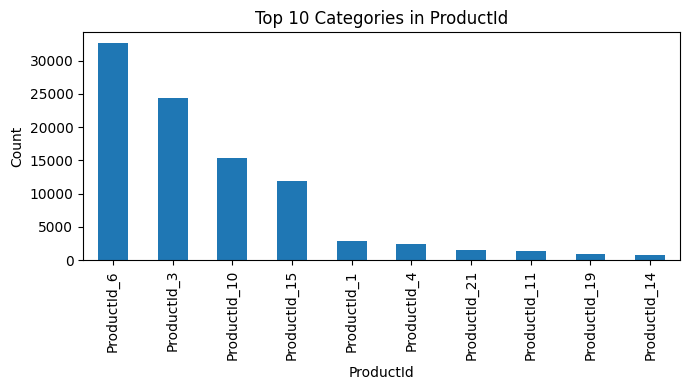

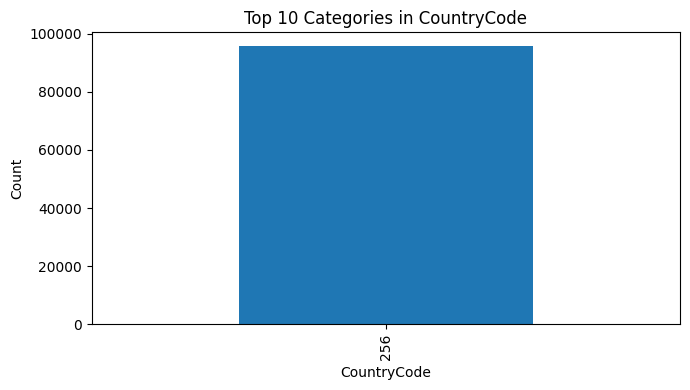

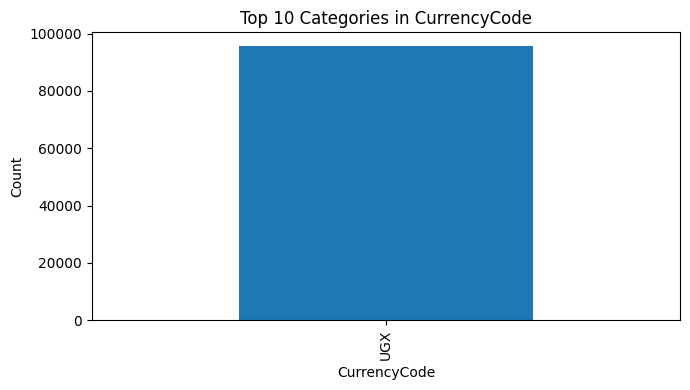

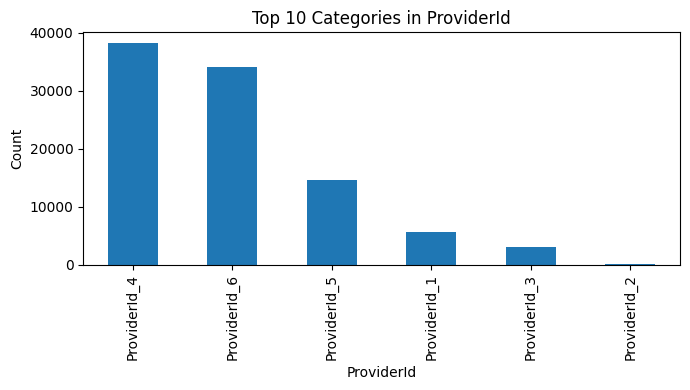

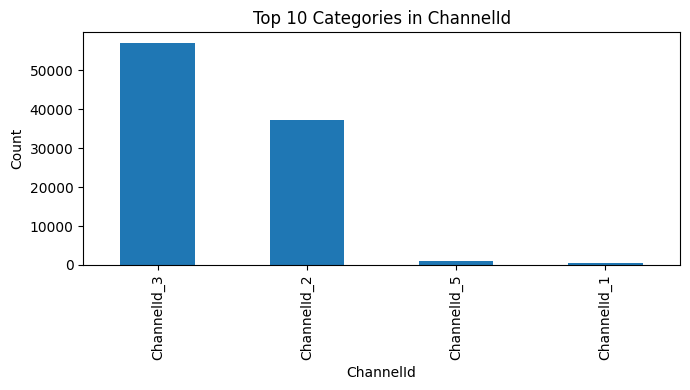

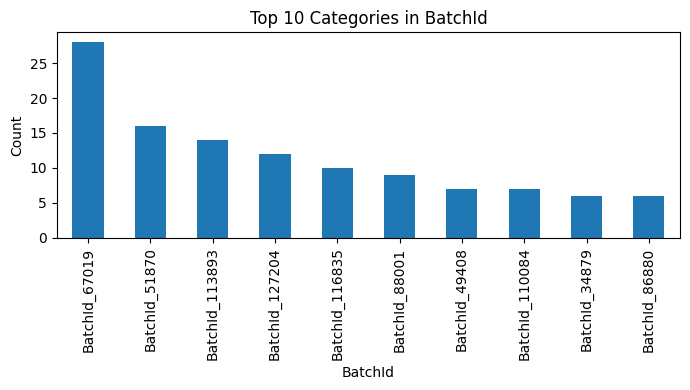

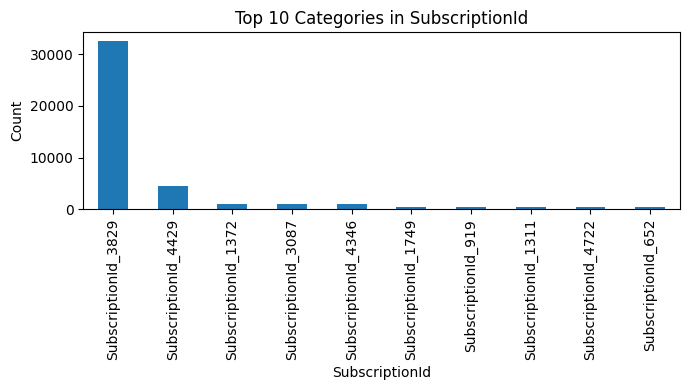

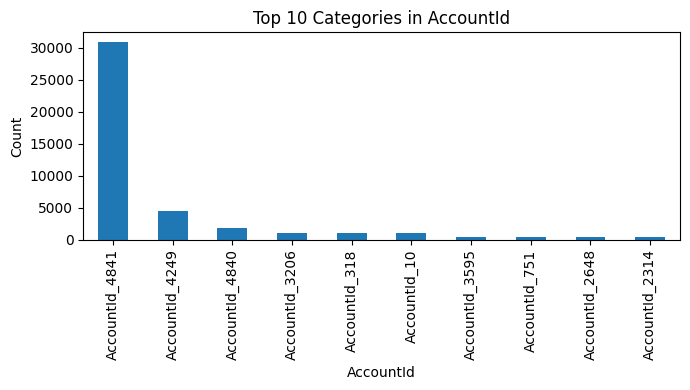

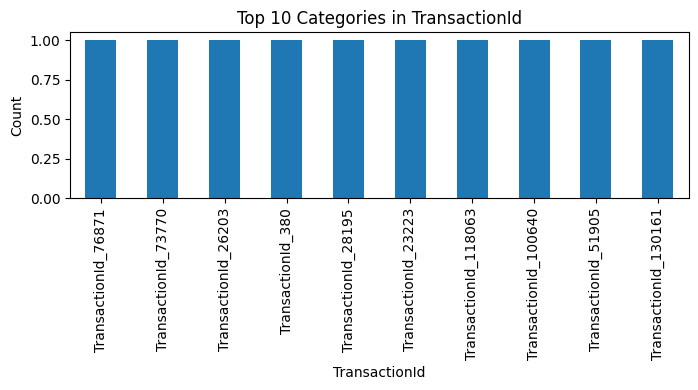

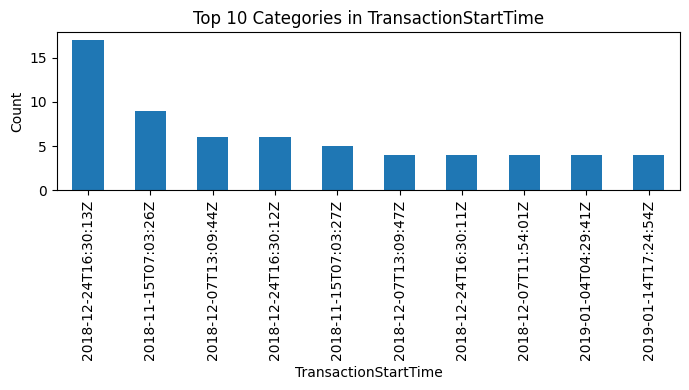

In [18]:
analyzer.plot_categorical_distributions()

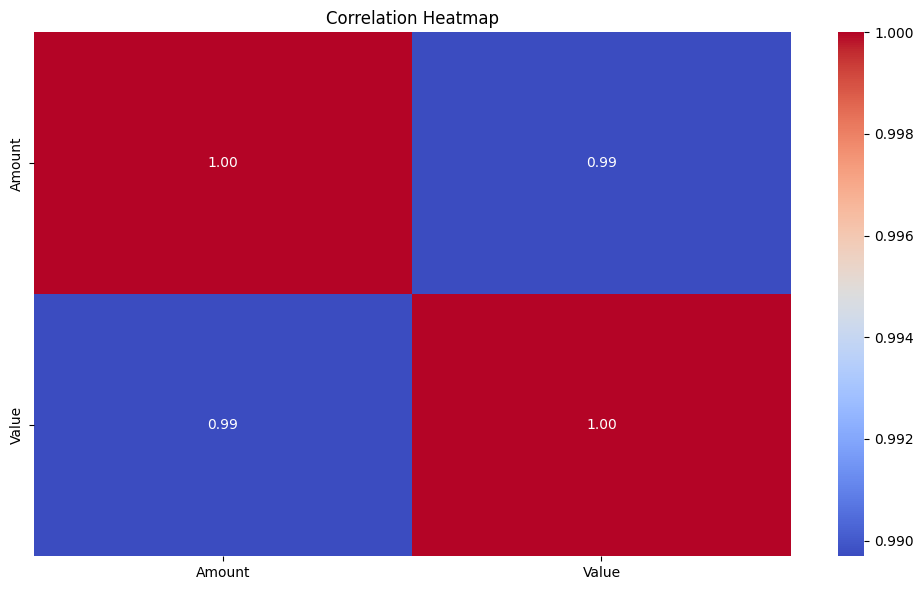

,Amount,Value
Amount,1.000000,0.989692
Value,0.989692,1.000000


In [10]:
analyzer.correlation_analysis()

In [11]:
analyzer.missing_values()

,missing_count,missing_percent
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


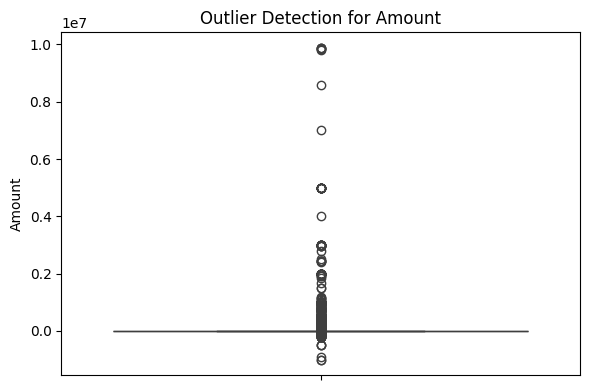

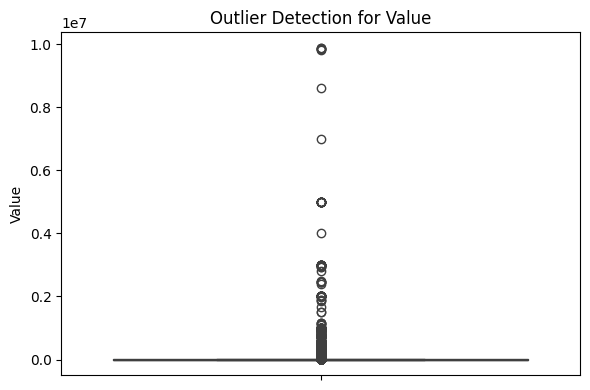

In [12]:
analyzer.outlier_detection()

key finding insight from EDA


1️⃣ Severe class imbalance in FraudResult

The target variable FraudResult is highly imbalanced, with the majority of transactions labeled as non-fraud (0) and only a small proportion labeled as fraud (1).

2️⃣ Amount shows a strongly right-skewed distribution

The Amount variable is dominated by low-value transactions, with a small number of very high-value transactions forming a long right tail. Both positive and negative values are observed, indicating different transaction directions within the dataset.

3️⃣ Financial Services and Airtime dominate ProductCategory

Within the ProductCategory variable, Financial Services and Airtime account for the highest transaction volumes, while other categories such as utilities and retail services appear far less frequently.

4️⃣ Transaction volume is concentrated in specific channels and providers

The ChannelId variable shows that a small number of channels process most transactions. Similarly, ProviderId is dominated by a few providers, while many providers have very low transaction counts.

5️⃣ Transaction activity varies by time of day and day of week

Analysis of TransactionStartTime reveals that transaction frequency peaks during specific hours of the day and differs across days of the week, indicating clear temporal patterns in user transaction behavior.